## Introduction

In this lab assessment, you will practice using SQL statements and the `.query()` method provided by Pandas to manipulate datasets. Pandas and SQL are both powerful tools for data manipulation and analysis, but they excel in different areas. SQL is designed for querying and managing relational databases, while pandas is a Python library for data manipulation and analysis in memory. By combining these tools, you can leverage the strengths of both:

- Data Extraction: Use SQL to efficiently query large datasets stored in databases. SQL is optimized for this and can handle complex joins and aggregations at the database level.
- Data Loading: Transfer the query results into pandas DataFrames. This brings the data into Python's ecosystem, where it can be further manipulated and analyzed.
- Data Manipulation: Once the data is in a DataFrame, use pandas' rich set of functions for cleaning, transforming, and analyzing data. Pandas is particularly good at handling time series data and performing operations on entire columns or datasets at once.
- Analysis and Visualization: With the data in pandas, you can easily perform statistical analyses, create visualizations, or feed the data into machine learning models.

This combination allows you to work with large datasets that might not fit into memory by using SQL to pre-process and filter the data before bringing it into pandas. It also lets you use familiar SQL syntax for initial data extraction before switching to pandas' pythonic interface for further analysis.

## Learning Objectives

You will be able to:

* Compare accessing data in a DataFrame using query methods and conditional logic
* Query DataFrames with SQL using the `pandasql` library

## Imports
Begin by running the cell below where we have provided code imports.

In [1]:
# CodeGrade step0
# Run this cell without changes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf

## Part 1: Load Data 

In this assessment, you will be working with the _Titanic Survivors_ dataset. This dataset contains information pertaining to whether a passenger survived the titantic ship disaster or not. It also contains data about each passenger such as cabin, class number, and family members that were onboard. 

Imagine that you're a data analyst working for a modern cruise line company. The company is planning to launch a new marketing campaign emphasizing their commitment to passenger safety. They want to use historical data from the Titanic disaster to create compelling narratives and inform their safety policies. You have been tasked with analyzing what factors might have affected survivorship.

### Step 1:
Using pandas, read in the data from `titanic.csv` and store it as a DataFrame in the variable `df`. Pass in `index_col=0` as an argument when loading in the data. Display the `.head()` to ensure that everything loaded correctly.

In [2]:
# CodeGrade step1

df = pd.read_csv('titanic.csv', index_col=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Part 2: Slicing DataFrames

In this section, you're looking to investigate whether women and children survived more than men, or that rich passengers were more likely to survive than poor passengers.  The easiest way to confirm this is to slice the data into DataFrames that contain each subgroup, and then quickly visualize the survival rate of each subgroup with histograms.

### Step 2:
In the cell below, create a DataFrame that contains all passengers that are female, and also contains all children (males included) ages 15 and under.   

Additionally, create a DataFrame that contains only adult male passengers over the age of 15.  

In [3]:
# CodeGrade step2
# Replace None with your code

women_and_children_df = df[(df['Sex'] == 'female') | (df['Age'] <= 15)]
adult_males_df = df[(df['Sex'] == 'male') & (df['Age'] > 15)]

Great! Now, you can use the `matplotlib` functionality built into the DataFrame objects to quickly create visualizations of the `Survived` column for each DataFrame.  

In the cell below, a histogram visualization is created of the `Survived` column for both DataFrames.

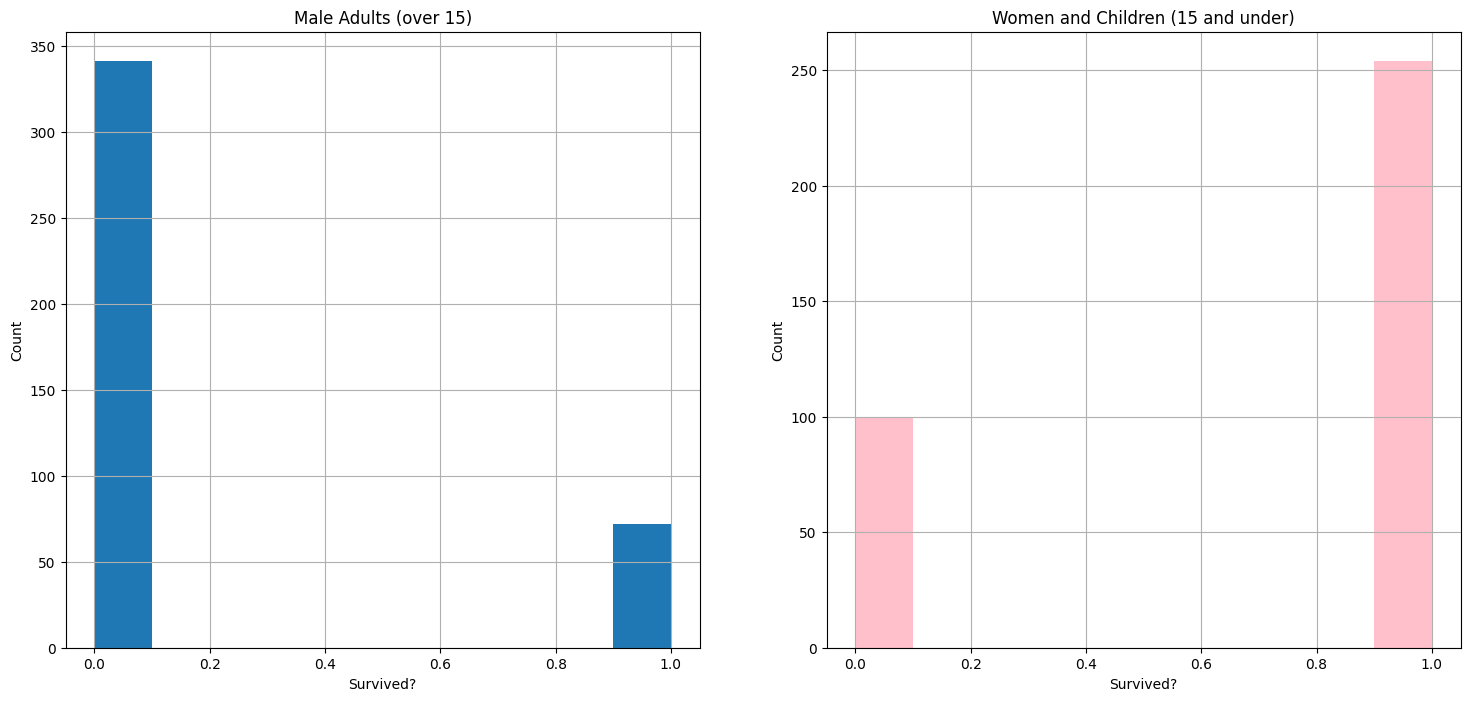

In [4]:
# Run this cell without changes
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 8)) # Two figures side by side
ax_lft = axes[0]
adult_males_df['Survived'].hist(ax=ax_lft)
ax_lft.set_title('Male Adults (over 15)')
ax_lft.set_xlabel('Survived?')
ax_lft.set_ylabel('Count')


ax_rght = axes[1]
women_and_children_df['Survived'].hist(ax=ax_rght, color='pink')
ax_rght.set_title('Women and Children (15 and under)')
ax_rght.set_xlabel('Survived?')
ax_rght.set_ylabel('Count');

Well that seems like a pretty stark difference -- it seems that there was drastically different behavior between the groups!  Now, let's repeat the same process, but separating rich and poor passengers.  

### Step 3:
In the cell below, create one DataFrame containing First Class passengers (`Pclass == 1`), and another DataFrame containing everyone else.

In [5]:
# CodeGrade step3
# Replace None with your code

first_class_df = df[df['Pclass'] == '1']
second_third_class_df = df[df['Pclass'] != '1']

Now, we create histograms of the survival for each subgroup, just as above.

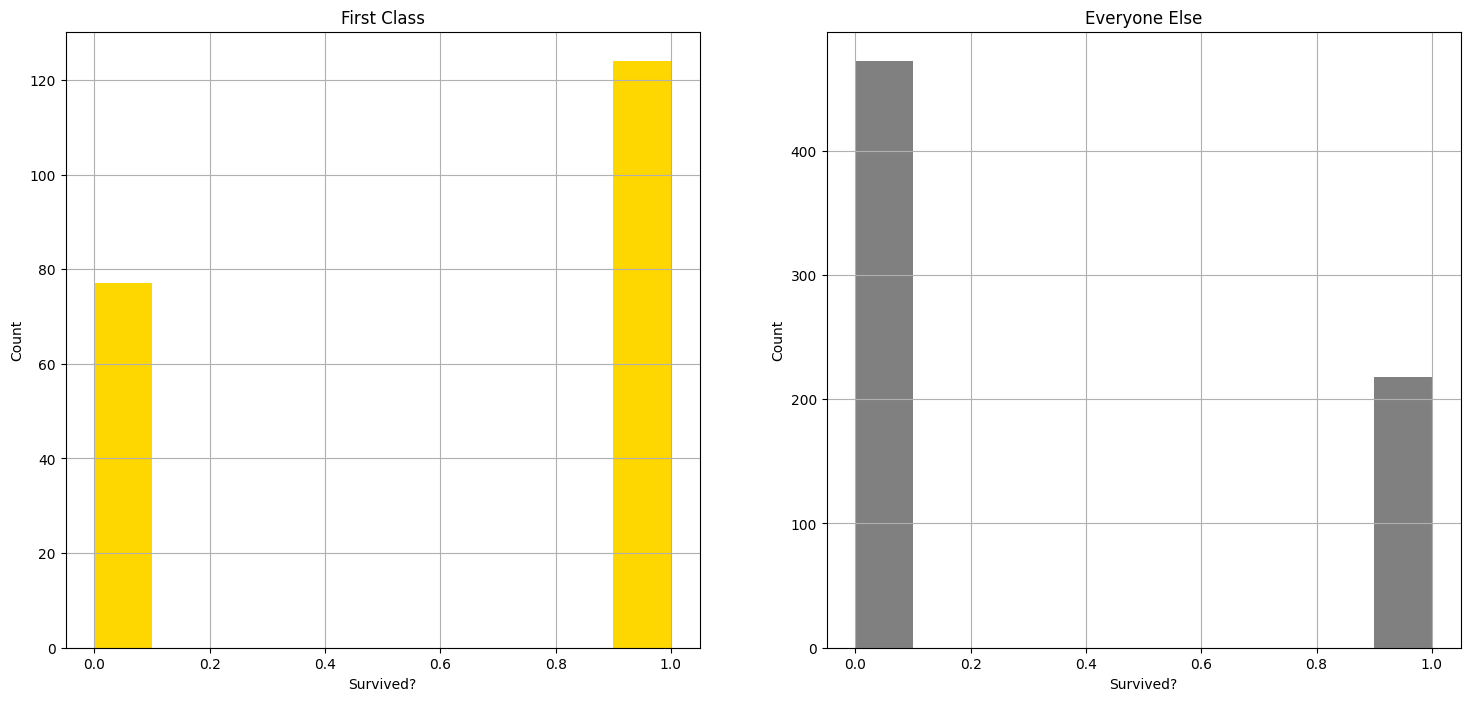

In [6]:
# Run this cell without changes
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 8)) # Two figures side by side
ax_lft = axes[0]
first_class_df['Survived'].hist(ax=ax_lft, color='gold')
ax_lft.set_title('First Class')
ax_lft.set_xlabel('Survived?')
ax_lft.set_ylabel('Count')


ax_rght = axes[1]
second_third_class_df['Survived'].hist(ax=ax_rght, color='grey')
ax_rght.set_title('Everyone Else')
ax_rght.set_xlabel('Survived?')
ax_rght.set_ylabel('Count');

To the surprise of absolutely no one, it seems like First Class passengers were more likely to survive than not, while 2nd and 3rd class passengers were more likely to die than not.  However, don't read too far into these graphs, as these aren't at the same scale, so they aren't fair comparisons.  

Slicing is a useful method for quickly getting DataFrames that contain only the examples we're looking for.  It's a quick, easy method that feels intuitive in Python, since we can rely on the same conditional logic that we would if we were just writing `if/else` statements.  

## Part 2: Query a DataFrame

Instead of slicing, you can also make use of the DataFrame's built-in `.query()` method.  This method reads a bit more cleanly and allows us to pass in our arguments as a string.

### Step 4:
In the cell below, use the `.query()` method to slice a DataFrame that contains only passengers who have a `PassengerId` greater than or equal to 500. 

In [7]:
# CodeGrade step4
# Replace None with your code

query_string = 'PassengerId >= 500'
high_passenger_number_df = df.query(query_string)
high_passenger_number_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S


Just as with slicing, you can pass in queries with multiple conditions.  One unique difference between using the `.query()` method and conditional slicing is that you can use `and` or `&` as well as `or` or `|` (for fun, try reading this last sentence out loud), while you are limited to the `&` and `|` symbols to denote and/or operations with conditional slicing.  

Let's take a look at trying to reproduce the slicing from the previous question about females and children above but this time using the .query() method instead. Because it is based on query language it will inherently be faster computationally.
### Step 5:
In the cell below, use the `query()` method to return a DataFrame that contains all female passengers and all children under the age of 15 (male and female).

**_Hint_**: Although the entire query is a string, you'll still need to denote that `female` is also a string, within the string. You will want to make use of both single (') and double (") quotes (_String-Ception?_).

In [8]:
# CodeGrade step5
# Replace None with your code

query_string = "Sex == 'female' or Age <= 15"
female_children_df = df.query(query_string)
female_children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


## Part 3: Eval Method

A cousin of the `query()` method, `eval()` allows you to use the same string-filled syntax as querying for creating new columns and evaulating conditional expressions against a DataFrame. This method also allows the user to specify if the operation should be done in place or not, providing a quick, easy syntax for complex feature engineering based on python operators.  
### Step 6:
In the cell below, use the DataFrame's `eval()` method to add a new column called 'Age_x_Fare', that equals the 'Age' multilpied by the 'Fare' for each passenger. 

In [9]:
# CodeGrade step6
# Replace None with your code

df = df.eval('Age_x_Fare = Age * Fare')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_x_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,159.5000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2708.7654
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,206.0500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1858.5000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,281.7500


## Part 4: Query DataFrame with SQL

For the final section of the assessment, you'll make use of the `pandasql` library.  Pandasql is a library designed to make it easy to query DataFrames directly with SQL syntax, which was open-sourced by the company, Yhat, in late 2016.

In the first cell of the notebook we imported pandsql as sqldf for you to use.

`pandasql` allows you to pass in SQL queries in the form of a string to directly query your database.  Each time you make a query, you need to pass an additional parameter that gives it access to the other variables in the session/environment. You can use a lambda function to pass `locals()` or `globals()` so that you don't have to type this every time.  
### Step 7:
In the cell below, create a variable called `pysqldf` and define it as a lambda function that will return in the passed globals and the query. Refer to the lesson and reading material if this is unclear.

In [10]:
# CodeGrade step7
# Replace None with your code

pysqldf = lambda q: sqldf(q, globals())

Great! That will save you from having to pass `globals()` as an argument every time you query, which can get a bit tedious.  

### Step 8:
In the cell below, write a SQL query that returns the names of the first 10 passengers. Use the pysqldf object you just created above to read the string query, defined as query1, and return a DataFrame.

Hint: Consider the name of the table you need to select from here, remember that you are trying to query your DataFrame object.

In [11]:
# CodeGrade step8
# Replace None with your code

query1 = """SELECT Name
       FROM df
       LIMIT 10;"""

passenger_names = pysqldf(query1)
passenger_names

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"




### Step 9:
In the cell below, query the DataFrame for the names and fares of any male passengers that survived, limit the results to the first 30 rows.  

In [12]:
# CodeGrade step9
# Replace None with your code

query2 = """SELECT Name, Fare
        FROM df
        WHERE Sex = 'male' AND Survived = 1
        LIMIT 30;"""


sql_surviving_males = pysqldf(query2)
sql_surviving_males

,Name,Fare
0,"Williams, Mr. Charles Eugene",13.0000
1,"Beesley, Mr. Lawrence",13.0000
2,"Sloper, Mr. William Thompson",35.5000
3,"Mamee, Mr. Hanna",7.2292
4,"Woolner, Mr. Hugh",35.5000
5,"Moubarek, Master. Gerios",15.2458
6,"Bing, Mr. Lee",56.4958
7,"Caldwell, Master. Alden Gates",29.0000
8,"Sheerlinck, Mr. Jan Baptist",9.5000
9,"Greenfield, Mr. William Bertram",63.3583


This library is really powerful! This makes it easy for you to leverage all of your SQL knowledge to quickly query any DataFrame, especially when you only want to select certain columns.  This saves you from having to slice/query the DataFrame and then slice the columns you want (or drop the ones you don't want).

Although it's outside the scope of this asessement, it's also worth noting that both `pandas` and `pandasql` provide built-in functionality for join operations, too!

## Part 5: Compare Counts

### Step 10:

In the cell below, create 2 separate DataFrames using `pandasql`. Your goal is to compare the different passenger class (Pclass) counts for all female passengers that survived against all female passengers that did not survive to see if class had an affect specifically on female survivorship.

Query3 should represent female passengers that survived and query4 should represent female passengers that did not survive.

*HINT*: Use the SQL GROUP BY statement in your queries.

In [13]:
# CodeGrade step10
# Replace None with your code

query3 = """SELECT Pclass, Count(*)
        FROM df
        WHERE Sex = 'female' AND Survived = 1
        GROUP BY Pclass;"""
query4 = """SELECT Pclass, Count(*)
        FROM df
        WHERE Sex = 'female' AND Survived = 0
        GROUP BY Pclass;"""


survived_females_by_pclass_df = pysqldf(query3)
died_females_by_pclass_df = pysqldf(query4)


Using your newly created dataframes we have provided the code to plot histograms to compare visually.

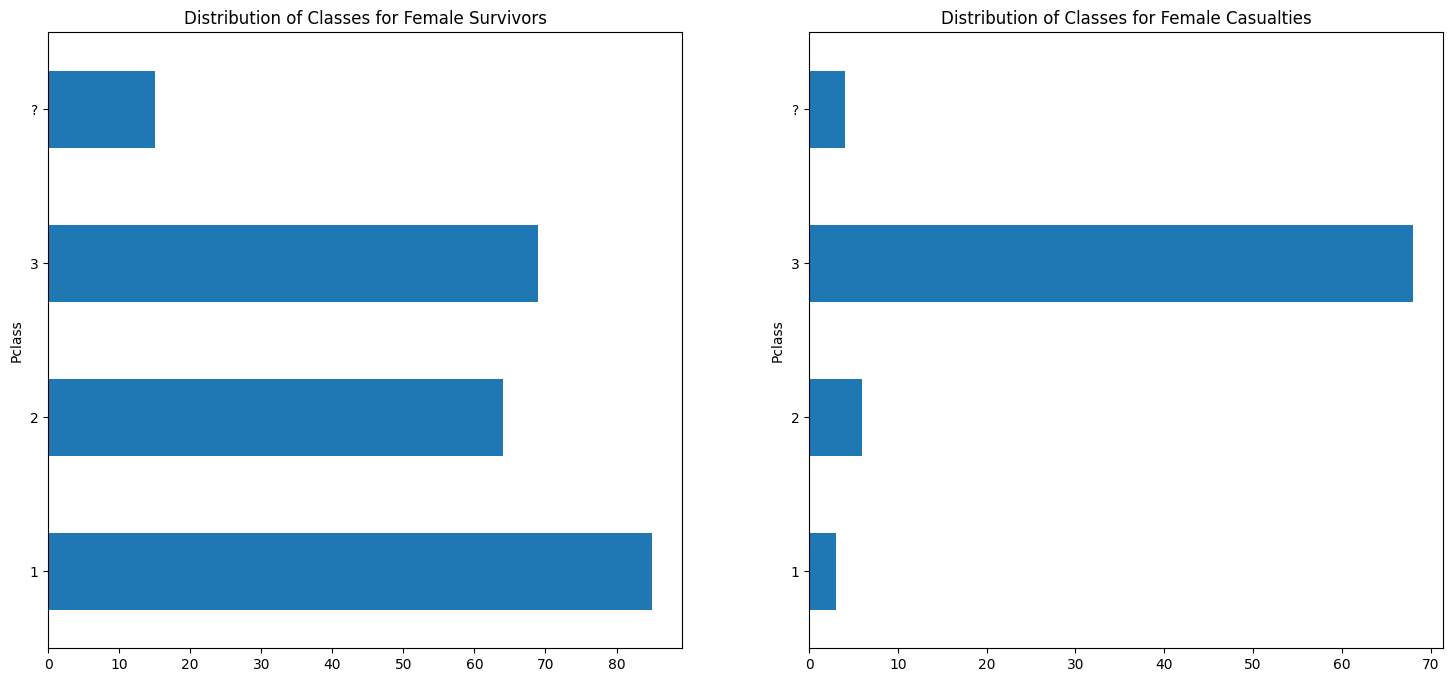

In [14]:
# Run this cell without changes
# Create and label the histograms for each!
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,8))


survived_females_by_pclass_df.set_index('Pclass')['Count(*)'].plot(kind='barh', ax=axes[0])
axes[0].set_title('Distribution of Classes for Female Survivors')


died_females_by_pclass_df.set_index('Pclass')['Count(*)'].plot(kind='barh', ax=axes[1])
axes[1].set_title('Distribution of Classes for Female Casualties');